Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

(This is different that the data I used in the lecture)

Plot:

The temperature
The mean temperature each day
The mean temperature for each month
60% of the marks will be given for the above

For the last 40%

Plot:

The Windspeed (there is data missing from this column)
The rolling windspeed (say over 24 hours)
The max windspeed for each day
The monthly mean of the daily max windspeeds (yer I am being nasty here)
You do not need to over comment your code. Marks will be given for how nice the plots are.

In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [259]:

df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/mly4935.csv", skiprows=19)
df.head(3)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,
1,1996,10,9.7,,,12.5,7.0,,,,,
2,1996,11,5.0,,,7.6,2.5,,,,,


In [260]:
df["day"]=1
df.head(3)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,day
0,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,,1
1,1996,10,9.7,,,12.5,7.0,,,,,,1
2,1996,11,5.0,,,7.6,2.5,,,,,,1


In [261]:
df['date']=pd.to_datetime(df[['year', 'month', 'day']])
df['date']

0     1996-08-01
1     1996-10-01
2     1996-11-01
3     1996-12-01
4     1997-01-01
         ...    
344   2025-05-01
345   2025-06-01
346   2025-07-01
347   2025-08-01
348   2025-09-01
Name: date, Length: 349, dtype: datetime64[ns]

<Axes: xlabel='date', ylabel='meant'>

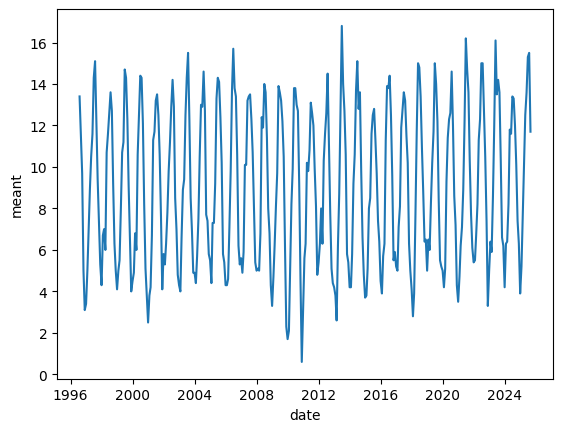

In [262]:


# plot the mean temperature
sns.lineplot(data=df, x="date", y="meant")

<Axes: xlabel='date', ylabel='meant'>

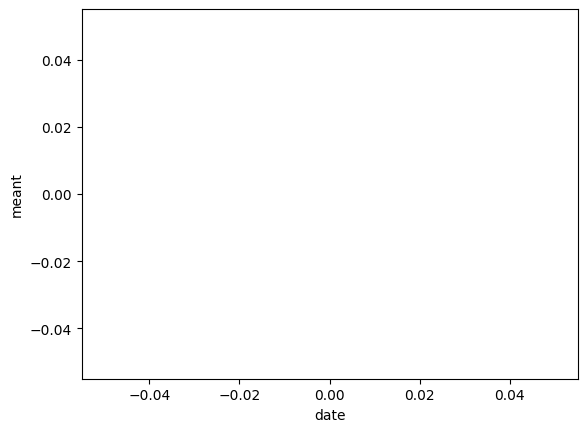

In [263]:

dateFrom = "2010-01-01 01:00:00"
dateTo = "2011-01-01 01:00:00"
sns.lineplot(data=df.loc[dateFrom:dateTo], x="date", y="meant")

<Axes: xlabel='date', ylabel='meant'>

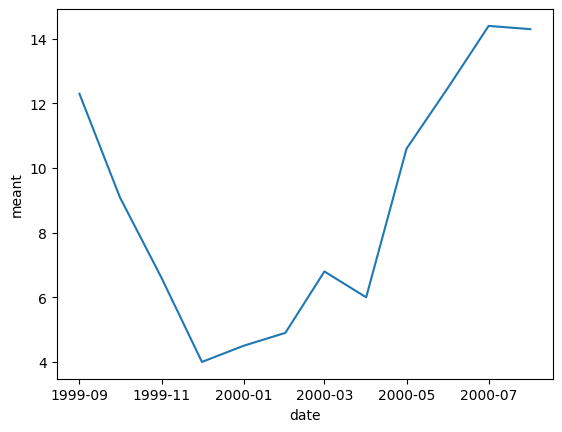

In [264]:
sns.lineplot(data=df.iloc[36:48], x="date", y="meant")

In [265]:
dateFrom = "2010-01-01 01:00:00"
dateTo = "2011-01-01 01:00:00"
df.loc[dateFrom:dateTo]['meant'].mean()

nan

In [267]:
import requests
import pandas as pd

url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'
df_new = pd.read_csv(url, parse_dates=['date'], dayfirst=True, na_values=['-', ''])
df = df.set_index('DATE')  # Set datetime index for resample()

ValueError: Missing column provided to 'parse_dates': 'date'

In [ ]:
rng = pd.date_range("1/1/2012", periods=100, freq="s")

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

ts.resample("5Min").sum()

2012-01-01    26089
Freq: 5min, dtype: int32